# Gradientes

In [1]:
# %matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
print(cv.__version__)

3.4.2



Tamaño imagen: (350, 735) 


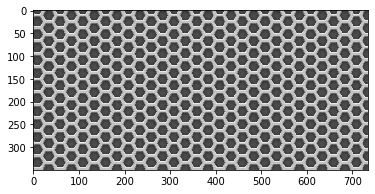

In [3]:
img = cv.imread('metalgrid.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray,(5,5),0)


print('\nTamaño imagen: {} '.format(gray.shape))

plt.imshow(img)
plt.show()

##  Determinación de gradientes en x e y con Sobel

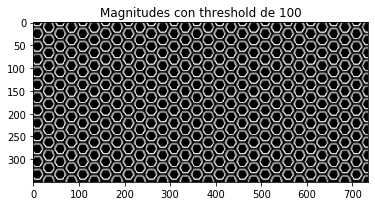

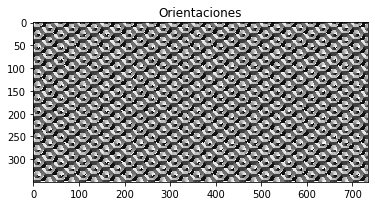

In [4]:
# Sobel en dirección x
sobelx_64 = cv.Sobel(gray,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = (absx_64/absx_64.max())*255
sobelx_8u = np.uint8(sobelx_8u1)

# Sobel en dirección y
sobely_64 = cv.Sobel(gray,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = (absy_64/absy_64.max())*255
sobely_8u = np.uint8(sobely_8u1)

# Cálculo de la magnitud con la hipotenusa
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

# Cálculo del ángulo con la arcotangente
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

# Mostramos la imagen de magnitudes con un threshold determinado
mask = mag < 20
th_mag = mag
th_mag[mask] = 0
th_mag = np.uint8(th_mag)

plt.imshow(th_mag, 'gray')
plt.title("Magnitudes con threshold de 100")
plt.show()

plt.imshow(angle, 'gray')
plt.title("Orientaciones")
plt.show()

## Gráfica de las direcciones

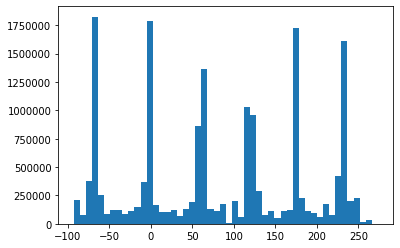

[-67.61215646  -1.55760411 174.58786883 233.30302647  64.49694824
 115.87271118 123.21210589  57.15755354 225.96363177 -74.95155116
  -8.89699881 130.55150059 -60.27276175 181.92726353 247.98181588
 -89.63034058 101.19392177 240.64242118  49.81815883  86.51513236]
7.339394705636167


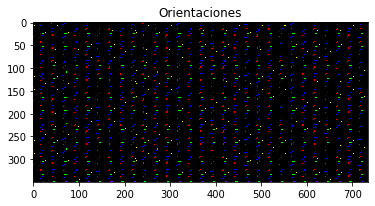

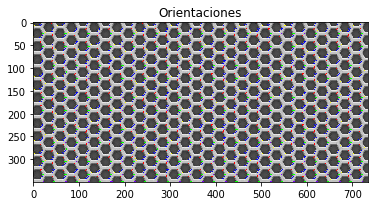

In [8]:
# Aplanamos la matriz para poder realizar operaciones de arrays
flatten_mag = th_mag.flatten()
flatten_ang = angle.flatten()

# Obtenemos los valores únicos de magnitud y sus indices
u_mag, mag_indices = np.unique(flatten_mag, return_index=True)
u_mag = u_mag.reshape(-1, 1)
mag_indices = mag_indices.reshape(-1, 1)

# Sumamos 90° a los ángulos calculados
flatten_ang = flatten_ang + 90

# Ordenamos el vector de magnitudes únicas de mayor a menor
order_u_mag = u_mag[: :-1]
order_mag_indices = mag_indices[: : -1]

# Aplicamos una máscara para quedarnos únicamente con las magnitudes mayores a 200
mask = order_u_mag > 200

# Se imprimen los valores de magnitud y ángulo correspondientes a la máscara
# print(order_u_mag[mask], flatten_ang[order_mag_indices[mask]])


# Subdividimos el rango angular en max_div steps
max_div = 50
ang_div = np.linspace(np.amin(flatten_ang), np.amax(flatten_ang), max_div)
int_div = np.zeros_like(ang_div)
ang_plot = np.zeros_like(ang_div)
for i, div in enumerate(ang_div):
    if i!= (max_div-1):
        div_mask = (flatten_ang > div) & (flatten_ang<ang_div[i+1])
        int_div[i] = np.sum(flatten_mag[div_mask])    
    else:
        break;
        
plt.figure(2)
plt.bar(ang_div, int_div, width=(ang_div[1]-ang_div[0]))
plt.show()

# En la gráfica se observan las mayores magnitudes para los ángulos principales que coinciden con la imagen

idx = np.argsort(int_div)[::-1]
print(ang_div[idx][0:20])
print(ang_div[1]-ang_div[0])

# Establezco colores para graficar las direcciones
color_g1 = np.array([255, 0, 0])  # Rojo
color_g2 = np.array([0, 255, 0])  # Verde
color_g3 = np.array([0, 0, 255])  # Azul
color_g4 = np.array([255, 255, 0])  # Amarillo
color_g5 = np.array([127, 0, 255])  # Violeta
color_g6 = np.array([255, 128, 0])  # Naranja

mask= mag > 50

# Armamos una nueva imagen sobre la original

metal_grid = cv.imread('metalgrid.jpg')
metal_grid = cv.cvtColor(metal_grid, cv.COLOR_BGR2RGB)

image_map = np.zeros((angle.shape[0], angle.shape[1], 3), dtype=np.uint8)

image_map[ mask & ((angle>-55) & (angle<-35)) ] = color_g1
image_map[ mask & ((angle>-10) & (angle<10)) ] = color_g2
image_map[ mask & ((angle>35) & (angle<45)) ] = color_g3
image_map[ mask & ((angle>125) & (angle<135)) ] = color_g4
image_map[ mask & ((angle>170) & (angle<190)) ] = color_g5
image_map[ mask & ((angle>215) & (angle<240)) ] = color_g6

plt.imshow(image_map)
plt.title("Orientaciones")
plt.show()

metal_grid[ mask & ((angle>-55) & (angle<-35)) ] = color_g1
metal_grid[ mask & ((angle>-10) & (angle<10)) ] = color_g2
metal_grid[ mask & ((angle>35) & (angle<45)) ] = color_g3
metal_grid[ mask & ((angle>125) & (angle<135)) ] = color_g4
metal_grid[ mask & ((angle>170) & (angle<190)) ] = color_g5
metal_grid[ mask & ((angle>215) & (angle<240)) ] = color_g6


plt.imshow(metal_grid)
plt.title("Orientaciones")
plt.show()

# cv.imshow("Orientaciones", cv.cvtColor(metal_grid, cv.COLOR_RGB2BGR)
# )
# cv.waitKey(0)
